# Credit Card Fraud Detection

* 불균형, 분류 모델, 파라미터 연습

### 데이터 설명(출처: kaggle)
* It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'.
* Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.
* The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.
* Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

In [4]:
# 패키지 설치
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, precision_score, recall_score, auc
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report, accuracy_score, f1_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import confusion_matrix
from IPython.display import Image

from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import BorderlineSMOTE
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks

from sklearn.feature_extraction.text import CountVectorizer

## 데이터 불러오고 기본 정보 확인

In [7]:
# 데이터 불러오기
credit= pd.read_csv('C:/Users/82102/Desktop/creditcard.csv')
credit

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
# 데이터 정보 확인
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

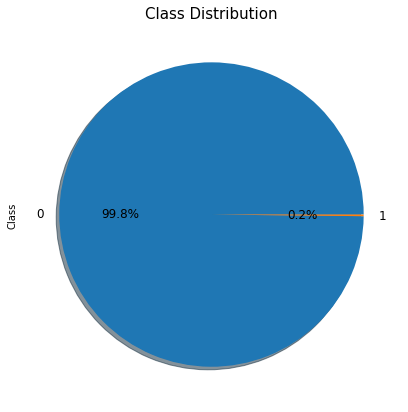

In [4]:
f, ax = plt.subplots(figsize=(7, 7))
credit['Class'].value_counts().plot.pie(shadow= True, ax= ax, autopct='%1.1f%%',textprops={'fontsize': 12} )

ax.set_title('Class Distribution', fontsize = 15);

* 불균형 매우 심함

## EDA 및 시각화

In [5]:
credit.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.758702e-12,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,-8.252296e-13,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-9.637438e-13,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,8.316234e-13,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,1.592013e-13,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,4.247308e-13,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-3.050183e-13,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,8.692882e-14,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-1.179710e-12,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


import pandas_profiling
report = pandas_profiling.ProfileReport(credit)
display(report)

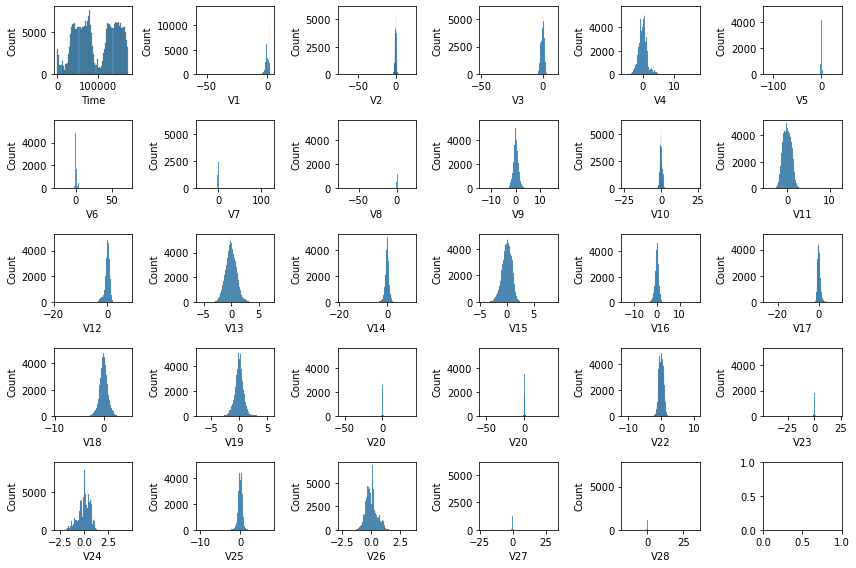

In [6]:
fig,axes = plt.subplots(nrows=5,ncols=6,figsize=(12,8))
sns.histplot(x="Time",data= credit,ax=axes[0,0])
sns.histplot(x="V1", data= credit, ax=axes[0,1])
sns.histplot(x="V2", data= credit,ax=axes[0,2])
sns.histplot(x="V3", data= credit,ax=axes[0,3])
sns.histplot(x="V4", data= credit,ax=axes[0,4])
sns.histplot(x="V5", data= credit,ax=axes[0,5])
sns.histplot(x="V6", data= credit,ax=axes[1,0])
sns.histplot(x="V7", data= credit,ax=axes[1,1])
sns.histplot(x="V8", data= credit,ax=axes[1,2])
sns.histplot(x="V9", data= credit,ax=axes[1,3])
sns.histplot(x="V10", data= credit,ax=axes[1,4])
sns.histplot(x="V11", data= credit,ax=axes[1,5])
sns.histplot(x="V12", data= credit,ax=axes[2,0])
sns.histplot(x="V13", data= credit, ax=axes[2,1])
sns.histplot(x="V14", data= credit,ax=axes[2,2])
sns.histplot(x="V15", data= credit,ax=axes[2,3])
sns.histplot(x="V16", data= credit,ax=axes[2,4])
sns.histplot(x="V17", data= credit, ax=axes[2,5])
sns.histplot(x="V18", data= credit,ax=axes[3,0])
sns.histplot(x="V19", data= credit,ax=axes[3,1])
sns.histplot(x="V20", data= credit,ax=axes[3,2])
sns.histplot(x="V20", data= credit,ax=axes[3,3])
sns.histplot(x="V21", data= credit,ax=axes[3,3])
sns.histplot(x="V22", data= credit,ax=axes[3,4])
sns.histplot(x="V23", data= credit,ax=axes[3,5])
sns.histplot(x="V24", data= credit,ax=axes[4,0])
sns.histplot(x="V25", data= credit,ax=axes[4,1])
sns.histplot(x="V26", data= credit,ax=axes[4,2])
sns.histplot(x="V27", data= credit,ax=axes[4,3])
sns.histplot(x="V28", data= credit,ax=axes[4,4])
plt.tight_layout()

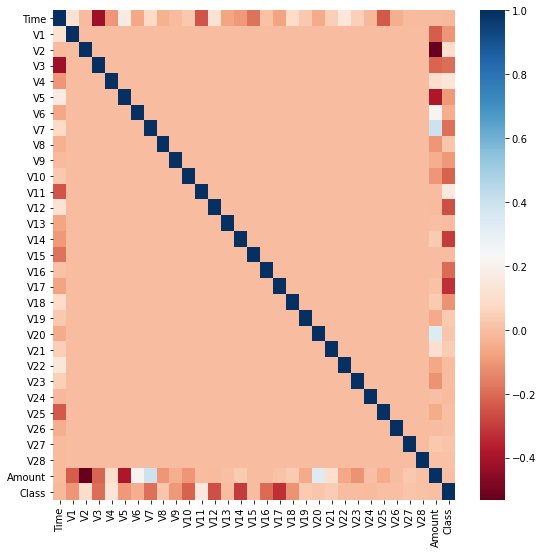

In [7]:
plt.figure(figsize=(9,9))
corr = credit.corr()
sns.heatmap(corr, cmap='RdBu')

## 모델링

In [8]:
# 타깃데이터 설정: Class
target = credit['Class']
data = credit.drop(['Class'],axis = 1, inplace=False)

In [9]:
# 데이터 세트 분리
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size= 0.3, random_state=156)

## 불균형 처리 전 기본모델

* 사기인 것을 아닌 것으로 분류하는 것이 제일 위험하므로 재현율에 초점을 맞추기로 함

### Logistic Regression

In [10]:
# 로지스틱 회귀를 이용해 학습 및 예측 수행
lr = LogisticRegression(solver='lbfgs', max_iter=1000)
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

In [11]:
cm = confusion_matrix(y_test, lr_preds)
cm

array([[85270,    17],
       [   50,   106]], dtype=int64)

In [12]:
#정확도
print('accuracy:{:0.4f}'.format(accuracy_score(y_test, lr_preds)))
# 정밀도
print('precision: {:0.4f}'.format(precision_score(y_test, lr_preds)))
#재현율
print('recall: {:0.4f}'.format(recall_score(y_test, lr_preds)))
# ROC_AUC
print('roc_auc: {:0.4f}'.format(roc_auc_score(y_test, lr_preds)))

accuracy:0.9992
precision: 0.8618
recall: 0.6795
roc_auc: 0.8396


### NaiveBayes(GaussianNB, BernoulliNB, MultinomialNB:X)

In [13]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

In [14]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_preds = gnb.predict(X_test)

In [15]:
cm = confusion_matrix(y_test, gnb_preds)
cm

array([[84779,   508],
       [   48,   108]], dtype=int64)

In [16]:
#정확도
print('accuracy:{:0.4f}'.format(accuracy_score(y_test, gnb_preds)))
# 정밀도
print('precision: {:0.4f}'.format(precision_score(y_test, gnb_preds)))
#재현율
print('recall: {:0.4f}'.format(recall_score(y_test, gnb_preds)))
# ROC_AUC
print('roc_auc: {:0.4f}'.format(roc_auc_score(y_test, gnb_preds)))

accuracy:0.9935
precision: 0.1753
recall: 0.6923
roc_auc: 0.8432


In [17]:
bnb = BernoulliNB()
bnb.fit(X_train,y_train)
bnb_preds = bnb.predict(X_test)

In [18]:
cm = confusion_matrix(y_test, bnb_preds)
cm

array([[85261,    26],
       [   46,   110]], dtype=int64)

In [19]:
#정확도
print('accuracy:{:0.4f}'.format(accuracy_score(y_test, bnb_preds)))
# 정밀도
print('precision: {:0.4f}'.format(precision_score(y_test, bnb_preds)))
#재현율
print('recall: {:0.4f}'.format(recall_score(y_test, bnb_preds)))
# ROC_AUC
print('roc_auc: {:0.4f}'.format(roc_auc_score(y_test, bnb_preds)))

accuracy:0.9992
precision: 0.8088
recall: 0.7051
roc_auc: 0.8524


### Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_preds = rf.predict(X_test)

In [21]:
cm = confusion_matrix(y_test, rf_preds)
cm

array([[85282,     5],
       [   32,   124]], dtype=int64)

In [22]:
#정확도
print('accuracy:{:0.4f}'.format(accuracy_score(y_test, rf_preds)))
# 정밀도
print('precision: {:0.4f}'.format(precision_score(y_test, rf_preds)))
#재현율
print('recall: {:0.4f}'.format(recall_score(y_test,rf_preds)))
# ROC_AUC
print('roc_auc: {:0.4f}'.format(roc_auc_score(y_test, rf_preds)))

accuracy:0.9996
precision: 0.9612
recall: 0.7949
roc_auc: 0.8974


### SVM

In [23]:
from sklearn.svm import SVC, LinearSVC
import mglearn
from sklearn.datasets import make_blobs

In [24]:
svm = LinearSVC(max_iter=1000)
svm.fit(X_train, y_train)
svm_preds = svm.predict(X_test)

C:\Users\82102\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [25]:
cm = confusion_matrix(y_test, svm_preds)
cm

array([[85275,    12],
       [  132,    24]], dtype=int64)

In [26]:
#정확도
print('accuracy:{:0.4f}'.format(accuracy_score(y_test, svm_preds)))
# 정밀도
print('precision: {:0.4f}'.format(precision_score(y_test, svm_preds)))
#재현율
print('recall: {:0.4f}'.format(recall_score(y_test,svm_preds)))
# ROC_AUC
print('roc_auc: {:0.4f}'.format(roc_auc_score(y_test, svm_preds)))

accuracy:0.9983
precision: 0.6667
recall: 0.1538
roc_auc: 0.5769


## 데이터 불균형 처리 - oversampling 사용

* Random Over Sampling, ADASYN, SMOTE, Borderline-SMOTE

## Random Over Sampling

In [27]:
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X_train, y_train)
print(Counter(y_ros))

Counter({0: 199028, 1: 199028})


### Random Over Sampling+ Logistic Regression

In [81]:
lr_ros = LogisticRegression(solver='lbfgs', max_iter=100)
lr_ros.fit(X_ros, y_ros)
lr_pred_ros = lr_ros.predict(X_test)

In [82]:
confusion_matrix(lr_pred_ros, y_test)

array([[81729,    17],
       [ 3558,   139]], dtype=int64)

In [83]:
#정확도
print('accuracy:{:0.4f}'.format(accuracy_score(y_test, lr_pred_ros)))
# 정밀도
print('precision: {:0.4f}'.format(precision_score(y_test, lr_pred_ros)))
#재현율
print('recall: {:0.4f}'.format(recall_score(y_test, lr_pred_ros)))
# ROC_AUC
print('roc_auc: {:0.4f}'.format(roc_auc_score(y_test, lr_pred_ros)))

accuracy:0.9582
precision: 0.0376
recall: 0.8910
roc_auc: 0.9247


In [31]:
print(classification_report(y_test, lr_pred_ros))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     85287
           1       0.04      0.89      0.07       156

    accuracy                           0.96     85443
   macro avg       0.52      0.92      0.53     85443
weighted avg       1.00      0.96      0.98     85443



### Random Over Sampling+ NaiveBayes(GaussianNB, BernoulliNB, MultinomialNB:X)

In [32]:
gnb_ros = GaussianNB()
gnb_ros.fit(X_ros, y_ros)
gnb_pred_ros = gnb_ros.predict(X_test)

In [33]:
confusion_matrix(gnb_pred_ros, y_test)

array([[84587,    37],
       [  700,   119]], dtype=int64)

In [34]:
#정확도
print('accuracy:{:0.4f}'.format(accuracy_score(y_test, gnb_pred_ros)))
# 정밀도
print('precision: {:0.4f}'.format(precision_score(y_test, gnb_pred_ros)))
#재현율
print('recall: {:0.4f}'.format(recall_score(y_test, gnb_pred_ros)))
# ROC_AUC
print('roc_auc: {:0.4f}'.format(roc_auc_score(y_test, gnb_pred_ros)))

accuracy:0.9914
precision: 0.1453
recall: 0.7628
roc_auc: 0.8773


In [35]:
bnb_ros = BernoulliNB()
bnb_ros.fit(X_ros, y_ros)
bnb_pred_ros = bnb_ros.predict(X_test)

In [36]:
confusion_matrix(bnb_pred_ros, y_test)

array([[84623,    26],
       [  664,   130]], dtype=int64)

In [37]:
#정확도
print('accuracy:{:0.4f}'.format(accuracy_score(y_test, bnb_pred_ros)))
# 정밀도
print('precision: {:0.4f}'.format(precision_score(y_test, bnb_pred_ros)))
#재현율
print('recall: {:0.4f}'.format(recall_score(y_test, bnb_pred_ros)))
# ROC_AUC
print('roc_auc: {:0.4f}'.format(roc_auc_score(y_test, bnb_pred_ros)))

accuracy:0.9919
precision: 0.1637
recall: 0.8333
roc_auc: 0.9128


### Random Over Sampling+ Random Forest

In [38]:
rf_ros = RandomForestClassifier()
rf_ros.fit(X_ros, y_ros)
rf_pred_ros = rf_ros.predict(X_test)

In [39]:
confusion_matrix(rf_pred_ros, y_test)

array([[85278,    33],
       [    9,   123]], dtype=int64)

In [40]:
#정확도
print('accuracy:{:0.4f}'.format(accuracy_score(y_test, rf_pred_ros)))
# 정밀도
print('precision: {:0.4f}'.format(precision_score(y_test, rf_pred_ros)))
#재현율
print('recall: {:0.4f}'.format(recall_score(y_test, rf_pred_ros)))
# ROC_AUC
print('roc_auc: {:0.4f}'.format(roc_auc_score(y_test, rf_pred_ros)))

accuracy:0.9995
precision: 0.9318
recall: 0.7885
roc_auc: 0.8942


### Random Over Sampling + SVM

In [43]:
svm_ros = LinearSVC(max_iter=1000)
svm_ros.fit(X_ros, y_ros)
svm_pred_ros = svm_ros.predict(X_test)

C:\Users\82102\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [44]:
confusion_matrix(svm_pred_ros, y_test)

array([[82291,    25],
       [ 2996,   131]], dtype=int64)

In [45]:
#정확도
print('accuracy:{:0.4f}'.format(accuracy_score(y_test, svm_pred_ros)))
# 정밀도
print('precision: {:0.4f}'.format(precision_score(y_test, svm_pred_ros)))
#재현율
print('recall: {:0.4f}'.format(recall_score(y_test, svm_pred_ros)))
# ROC_AUC
print('roc_auc: {:0.4f}'.format(roc_auc_score(y_test, svm_pred_ros)))

accuracy:0.9646
precision: 0.0419
recall: 0.8397
roc_auc: 0.9023


## SMOTE

In [46]:
# 모델설정
sm = SMOTE()
X_sm, y_sm = sm.fit_resample(X_train, y_train)
print(Counter(y_sm))

Counter({0: 199028, 1: 199028})


### SMOTE+ Logistic Regression

In [47]:
lr_sm = LogisticRegression(solver='lbfgs', max_iter= 100)
lr_sm.fit(X_sm, y_sm)
lr_pred_sm = lr_sm.predict(X_test)

In [48]:
confusion_matrix(lr_pred_sm, y_test)

array([[83528,    18],
       [ 1759,   138]], dtype=int64)

In [50]:
#정확도
print('accuracy:{:0.4f}'.format(accuracy_score(y_test, lr_pred_sm)))
# 정밀도
print('precision: {:0.4f}'.format(precision_score(y_test, lr_pred_sm)))
#재현율
print('recall: {:0.4f}'.format(recall_score(y_test, lr_pred_sm)))
# ROC_AUC
print('roc_auc: {:0.4f}'.format(roc_auc_score(y_test, lr_pred_sm)))

accuracy:0.9792
precision: 0.0727
recall: 0.8846
roc_auc: 0.9320


### SMOTE + NaiveBayes(GaussianNB, BernoulliNB, MultinomialNB:X)

In [51]:
gnb_sm = GaussianNB()
gnb_sm.fit(X_sm, y_sm)
gnb_pred_sm = gnb_sm.predict(X_test)

In [52]:
confusion_matrix(gnb_pred_sm, y_test)

array([[84695,    35],
       [  592,   121]], dtype=int64)

In [53]:
#정확도
print('accuracy:{:0.4f}'.format(accuracy_score(y_test, gnb_pred_sm)))
# 정밀도
print('precision: {:0.4f}'.format(precision_score(y_test, gnb_pred_sm)))
#재현율
print('recall: {:0.4f}'.format(recall_score(y_test, gnb_pred_sm)))
# ROC_AUC
print('roc_auc: {:0.4f}'.format(roc_auc_score(y_test, gnb_pred_sm)))

accuracy:0.9927
precision: 0.1697
recall: 0.7756
roc_auc: 0.8843


In [54]:
bnb_sm = BernoulliNB()
bnb_sm.fit(X_sm, y_sm)
bnb_pred_sm = bnb_sm.predict(X_test)

In [55]:
confusion_matrix(bnb_pred_sm, y_test)

array([[85029,    28],
       [  258,   128]], dtype=int64)

In [56]:
#정확도
print('accuracy:{:0.4f}'.format(accuracy_score(y_test, bnb_pred_sm)))
# 정밀도
print('precision: {:0.4f}'.format(precision_score(y_test, bnb_pred_sm)))
#재현율
print('recall: {:0.4f}'.format(recall_score(y_test, bnb_pred_sm)))
# ROC_AUC
print('roc_auc: {:0.4f}'.format(roc_auc_score(y_test, bnb_pred_sm)))

accuracy:0.9967
precision: 0.3316
recall: 0.8205
roc_auc: 0.9087


### SMOTE + Random Forest

In [58]:
rf_sm = RandomForestClassifier()
rf_sm.fit(X_sm, y_sm)
rf_pred_sm = rf_sm.predict(X_test)

In [59]:
confusion_matrix(rf_pred_sm, y_test)

array([[85266,    26],
       [   21,   130]], dtype=int64)

In [60]:
#정확도
print('accuracy:{:0.4f}'.format(accuracy_score(y_test, rf_pred_sm)))
# 정밀도
print('precision: {:0.4f}'.format(precision_score(y_test, rf_pred_sm)))
#재현율
print('recall: {:0.4f}'.format(recall_score(y_test, rf_pred_sm)))
# ROC_AUC
print('roc_auc: {:0.4f}'.format(roc_auc_score(y_test, rf_pred_sm)))

accuracy:0.9994
precision: 0.8609
recall: 0.8333
roc_auc: 0.9165


### SMOTE + SVM

In [61]:
svm_sm = LinearSVC(max_iter=1000)
svm_sm.fit(X_ros, y_ros)
svm_pred_sm = svm_sm.predict(X_test)

C:\Users\82102\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [62]:
confusion_matrix(svm_pred_sm, y_test)

array([[68084,    18],
       [17203,   138]], dtype=int64)

In [63]:
#정확도
print('accuracy:{:0.4f}'.format(accuracy_score(y_test, svm_pred_sm)))
# 정밀도
print('precision: {:0.4f}'.format(precision_score(y_test, svm_pred_sm)))
#재현율
print('recall: {:0.4f}'.format(recall_score(y_test, svm_pred_sm)))
# ROC_AUC
print('roc_auc: {:0.4f}'.format(roc_auc_score(y_test, svm_pred_sm)))

accuracy:0.7985
precision: 0.0080
recall: 0.8846
roc_auc: 0.8415


## ADASYN

In [64]:
ad = ADASYN()
X_ad, y_ad = ad.fit_resample(X_train, y_train)
print(Counter(y_ad))

Counter({1: 199044, 0: 199028})


### ADASYN + Logistic Regression

In [65]:
lr_ad = LogisticRegression(solver='lbfgs', max_iter= 100)
lr_ad.fit(X_ad, y_ad)
lr_pred_ad = lr_ad.predict(X_test)

In [66]:
confusion_matrix(lr_pred_ad, y_test)

array([[82576,    18],
       [ 2711,   138]], dtype=int64)

In [68]:
#정확도
print('accuracy:{:0.4f}'.format(accuracy_score(y_test, lr_pred_ad)))
# 정밀도
print('precision: {:0.4f}'.format(precision_score(y_test, lr_pred_ad)))
#재현율
print('recall: {:0.4f}'.format(recall_score(y_test, lr_pred_ad)))
# ROC_AUC
print('roc_auc: {:0.4f}'.format(roc_auc_score(y_test, lr_pred_ad)))

accuracy:0.9681
precision: 0.0484
recall: 0.8846
roc_auc: 0.9264


### ADASYN + NaiveBayes(GaussianNB, BernoulliNB, MultinomialNB:X)

In [69]:
gnb_ad = GaussianNB()
gnb_ad.fit(X_ad, y_ad)
gnb_pred_ad = gnb_ad.predict(X_test)

In [70]:
confusion_matrix(gnb_pred_ad, y_test)

array([[84665,    34],
       [  622,   122]], dtype=int64)

In [71]:
#정확도
print('accuracy:{:0.4f}'.format(accuracy_score(y_test, gnb_pred_ad)))
# 정밀도
print('precision: {:0.4f}'.format(precision_score(y_test, gnb_pred_ad)))
#재현율
print('recall: {:0.4f}'.format(recall_score(y_test, gnb_pred_ad)))
# ROC_AUC
print('roc_auc: {:0.4f}'.format(roc_auc_score(y_test, gnb_pred_ad)))

accuracy:0.9923
precision: 0.1640
recall: 0.7821
roc_auc: 0.8874


In [72]:
bnb_ad = BernoulliNB()
bnb_ad.fit(X_ad, y_ad)
bnb_pred_ad = bnb_ad.predict(X_test)

In [73]:
confusion_matrix(bnb_pred_ad, y_test)

array([[85009,    28],
       [  278,   128]], dtype=int64)

In [74]:
#정확도
print('accuracy:{:0.4f}'.format(accuracy_score(y_test, bnb_pred_ad)))
# 정밀도
print('precision: {:0.4f}'.format(precision_score(y_test, bnb_pred_ad)))
#재현율
print('recall: {:0.4f}'.format(recall_score(y_test, bnb_pred_ad)))
# ROC_AUC
print('roc_auc: {:0.4f}'.format(roc_auc_score(y_test, bnb_pred_ad)))

accuracy:0.9964
precision: 0.3153
recall: 0.8205
roc_auc: 0.9086


### ADASYN + Random Forest

In [75]:
rf_ad = RandomForestClassifier()
rf_ad.fit(X_ad, y_ad)
rf_pred_ad = rf_ad.predict(X_test)

In [76]:
confusion_matrix(rf_pred_ad, y_test)

array([[85266,    29],
       [   21,   127]], dtype=int64)

In [77]:
#정확도
print('accuracy:{:0.4f}'.format(accuracy_score(y_test, rf_pred_ad)))
# 정밀도
print('precision: {:0.4f}'.format(precision_score(y_test, rf_pred_ad)))
#재현율
print('recall: {:0.4f}'.format(recall_score(y_test, rf_pred_ad)))
# ROC_AUC
print('roc_auc: {:0.4f}'.format(roc_auc_score(y_test, rf_pred_ad)))

accuracy:0.9994
precision: 0.8581
recall: 0.8141
roc_auc: 0.9069


### ADASYN + SVM

In [78]:
svm_ad = LinearSVC(max_iter=1000)
svm_ad.fit(X_ad, y_ad)
svm_pred_ad = svm_ad.predict(X_test)

C:\Users\82102\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [79]:
confusion_matrix(svm_pred_ad, y_test)

array([[83303,    24],
       [ 1984,   132]], dtype=int64)

In [80]:
#정확도
print('accuracy:{:0.4f}'.format(accuracy_score(y_test, svm_pred_ad)))
# 정밀도
print('precision: {:0.4f}'.format(precision_score(y_test, svm_pred_ad)))
#재현율
print('recall: {:0.4f}'.format(recall_score(y_test, svm_pred_ad)))
# ROC_AUC
print('roc_auc: {:0.4f}'.format(roc_auc_score(y_test, svm_pred_ad)))

accuracy:0.9765
precision: 0.0624
recall: 0.8462
roc_auc: 0.9114


## 재현율 가장 높은 모델 선택

* Random Over Sampling + Logistic Rogression

In [10]:
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X_train, y_train)
print(Counter(y_ros))

Counter({0: 199028, 1: 199028})


In [11]:
lr_ros = LogisticRegression(solver='lbfgs', max_iter=1000)
lr_ros.fit(X_ros, y_ros)
lr_pred_ros = lr_ros.predict(X_test)

In [12]:
confusion_matrix(lr_pred_ros, y_test)

array([[81725,    17],
       [ 3562,   139]], dtype=int64)

In [13]:
#정확도
print('accuracy:{:0.4f}'.format(accuracy_score(y_test, lr_pred_ros)))
# 정밀도
print('precision: {:0.4f}'.format(precision_score(y_test, lr_pred_ros)))
#재현율
print('recall: {:0.4f}'.format(recall_score(y_test, lr_pred_ros)))
# ROC_AUC
print('roc_auc: {:0.4f}'.format(roc_auc_score(y_test, lr_pred_ros)))

accuracy:0.9581
precision: 0.0376
recall: 0.8910
roc_auc: 0.9246


-> 재현율 0.8910으로 가장 좋음

## 파라미터 조절하기

In [14]:
from sklearn.model_selection import GridSearchCV

In [20]:
params={'penalty': ['l1','l2'],
       'C':[0.01,0.1,1,5,10]}

In [21]:
grid_lr_ros = GridSearchCV(lr_ros, param_grid = params, scoring = 'recall', cv=3)
grid_lr_ros.fit(X_ros, y_ros)
print('최적 하이퍼 파라미터:{0}, 최적 평균 재현율:{1:.3f}'.format(grid_lr_ros.best_params_,
                                                 grid_lr_ros.best_score_))

C:\Users\82102\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\82102\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\82102\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\82102\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\82102\anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\Users\82102\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\82102\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\82102\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\82102\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\82102\anaconda3\lib\site-packages\sklearn\model_selection\_v

최적 하이퍼 파라미터:{'C': 0.01, 'penalty': 'l2'}, 최적 평균 재현율:0.910


In [22]:
params={'penalty': ['l1','l2'],
       'C':[0.005,0.01,0.015]}

In [23]:
grid_lr_ros = GridSearchCV(lr_ros, param_grid = params, scoring = 'recall', cv=3)
grid_lr_ros.fit(X_ros, y_ros)
print('최적 하이퍼 파라미터:{0}, 최적 평균 재현율:{1:.3f}'.format(grid_lr_ros.best_params_,
                                                 grid_lr_ros.best_score_))

C:\Users\82102\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\82102\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\82102\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\82102\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\82102\anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\Users\82102\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.90898275        nan 0.91011324        nan 0.91106787]
  warnings.warn(


최적 하이퍼 파라미터:{'C': 0.015, 'penalty': 'l2'}, 최적 평균 재현율:0.911


### 최종: Logistic Regression + Random Over Sampling + L2규제 + C: 0.015
### -> 재현율 0.911